# NLP PIPELINE

There are mainly 4 stages of an NLP pipeline :  

## Exploratory Data Analysis
## Text Processing
    Cleaning
    Normalization
    Tokenize
    Stop word removal
    Stemming and Lemmatization
    POS and NER
    
## Feature Extraction
    Bag of Words
    TF-IDF
    word2vec
    Glove

##  Modeling
    Model
    Train
    Predict 

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Set up your environment & Import libraries and modules

In [ ]:
# DataFrame
import pandas as pd

# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
# Summary
from sklearn import datasets

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, FeatureUnion,make_pipeline
from sklearn.metrics import classification_report

from sklearn.naive_bayes import MultinomialNB

from scipy.stats import randint

# tensor-Keras
import tensorflow as tf 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from tensorflow.keras import utils
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
#from textstat.textstat import textstatistics,legacy_round
# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

# Word2vec
import gensim

# Utility
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools
import emoji
import spacy
import string
import warnings
import scipy.io
print("TensorFlow version: ", tf.__version__)

warnings.filterwarnings('ignore')

In [ ]:
# Import the hashing vectorizer
from sklearn.feature_extraction.text import HashingVectorizer
# Import functional utilities
from sklearn.preprocessing import FunctionTransformer, MaxAbsScaler
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [ ]:
# Import the datasets
train_raw= pd.read_csv('../input/commonlitreadabilityprize/train.csv')
test_raw = pd.read_csv('../input/commonlitreadabilityprize/test.csv')

In [ ]:

train_raw.head()

In [ ]:
test_raw.head()

# Exploratory Data Analysis
It’s always a good idea (and frankly, a mandatory step) to first explore the data we have. This helps us not only unearth hidden patterns, but gain a valuable overall insight into what we are working with.

####  Data Insights

In [ ]:
print(train_raw.shape)
train_raw.columns.values

In [ ]:
train_raw.info()

In [ ]:
train_raw.target.unique() 

In [ ]:
fig, ax = plt.subplots()
fig.suptitle("target", fontsize=12)
train_raw["target"].reset_index().groupby("target").count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
plt.show()

In [ ]:
s = pd.Series(train_raw.excerpt[0:10], dtype="string")
# Concatenating a single Series into a string
t=s.str.cat(sep=',')
# Import the word cloud function  
 
from wordcloud import WordCloud, STOPWORDS
# Create and generate a word cloud image 
my_cloud =  WordCloud(background_color='white', stopwords=STOPWORDS).generate(t)

# Display the generated wordcloud image
plt.imshow(my_cloud, interpolation='bilinear') 
plt.axis("off")
# Don't forget to show the final image
plt.show()

## Longest and shortest reviews

In [ ]:
### Longest and shortest reviews
length_reviews = train_raw.excerpt.str.len()

# How long is the longest review
print(max(length_reviews))
length_reviews = train_raw.excerpt.str.len()

# How long is the shortest review
print(min(length_reviews))

## Summary Statistics
### Check missing values

In [ ]:
train_raw.excerpt.isnull().sum()

In [ ]:
train_raw.excerpt.isna().sum()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.heatmap(train_raw.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

In [ ]:
import seaborn as sns

In [ ]:
train_raw.dropna()
train_raw.drop_duplicates()

# Named-Entity Recognition
NER (Named-entity recognition) is the process to tag named entities mentioned in unstructured text with pre-defined categories such as person names, organizations, locations, time expressions, quantities, etc.
Training a NER model is really time-consuming because it requires a pretty rich dataset. Luckily there is someone who already did this job for us. One of the best open source NER tools is SpaCy. It provides different NLP models that are able to recognize several categories of entities.


I will give an example using the SpaCy model en_core_web_lg (the large model for English trained on web data) on our usual headline (raw text, not preprocessed)

In [ ]:
import spacy
## call model
ner = spacy.load("en_core_web_lg")
## tag text
txt = train_raw.excerpt.iloc[0]
doc = ner(txt)
## display result
spacy.displacy.render(doc, style="ent")

In [ ]:
## tag text and exctract tags into a list
train_raw["tags"] = train_raw.excerpt.apply(lambda x: [(tag.text, tag.label_) 
                             for tag in ner(x).ents] )

In [ ]:
train_raw["tags"]

In [ ]:
import collections
## utils function to count the element of a list
def utils_lst_count(lst):
    dic_counter = collections.Counter()
    for x in lst:
        dic_counter[x] += 1
    dic_counter = collections.OrderedDict( 
                     sorted(dic_counter.items(), 
                     key=lambda x: x[1], reverse=True))
    lst_count = [ {key:value} for key,value in dic_counter.items() ]
    return lst_count

## count tags
train_raw["tags"] = train_raw["tags"].apply(lambda x: utils_lst_count(x))

## utils function create new column for each tag category
def utils_ner_features(lst_dics_tuples, tag):
    if len(lst_dics_tuples) > 0:
        tag_type = []
        for dic_tuples in lst_dics_tuples:
            for tuple in dic_tuples:
                type, n = tuple[1], dic_tuples[tuple]
                tag_type = tag_type + [type]*n
                dic_counter = collections.Counter()
                for x in tag_type:
                    dic_counter[x] += 1
        return dic_counter[tag]
    else:
        return 0

## extract features
tags_set = []
for lst in train_raw["tags"].tolist():
     for dic in lst:
        for k in dic.keys():
            tags_set.append(k[1])
tags_set = list(set(tags_set))
for feature in tags_set:
     train_raw["tags_"+feature] = train_raw["tags"].apply(lambda x: 
                             utils_ner_features(x, feature))



In [ ]:
## print result
train_raw.head()

In order to go deeper into the analysis, we need to unpack the column “tags” we created in the previous code. Let’s plot the most frequent tags for one of the headline categories:

In [ ]:
tags_list = train_raw["tags"].sum()
map_lst = list(map(lambda x: list(x.keys())[0], tags_list))
dtf_tags = pd.DataFrame(map_lst, columns=['tag','type'])
dtf_tags["count"] = 1
dtf_tags = dtf_tags.groupby(['type',  
                'tag']).count().reset_index().sort_values("count", 
                 ascending=False)
fig, ax = plt.subplots()
fig.suptitle("Top frequent tags", fontsize=12)
sns.barplot(x="count", y="tag", hue="type", 
            data=dtf_tags.iloc[:20,:], dodge=False, ax=ax)
ax.grid(axis="x")
plt.show()

Moving forward with another useful application of NER: do you remember when we removed stop words losing the word “Will” from the name of “Will Smith”? An interesting solution to that problem would be replacing “Will Smith” with “Will_Smith”, so that it won’t be affected by stop words removal. Since going through all the texts in the dataset to change names would be impossible, let’s use SpaCy for that. As we know, SpaCy can recognize a person name, therefore we can use it for name detection and then modify the string.

In [ ]:
## predict wit NER
txt = train_raw["excerpt"].iloc[0]
entities = ner(txt).ents
## tag text
tagged_txt = txt
for tag in entities:
    tagged_txt = re.sub(tag.text, "_".join(tag.text.split()), 
                        tagged_txt) 
## show result
print(tagged_txt)

# Text variable
To analyze the text variable we create a class **TextCounts**. In this class we compute some basic statistics on the text variable. This class can be used later in a Pipeline, as well.

* **count_words** : number of words in the tweet
* **count_mentions** : referrals to other Twitter accounts, which are preceded by a @
* **count_hashtags** : number of tag words, preceded by a #
* **count_capital_words** : number of uppercase words, could be used to *"shout"* and express (negative) emotions
* **count_excl_quest_marks** : number of question or exclamation marks
* **count_urls** : number of links in the tweet, preceded by http(s)
* **count_emojis** : number of emoji, which might be a good indication of the sentiment

# Readability Index
Readability is the ease with which a reader can understand a written text. In natural language, the readability of text depends on its content (the complexity of its vocabulary and syntax). It focuses on the words we choose, and how we put them into sentences and paragraphs for the readers to comprehend. 

Our main objective in writing is to pass along information that both the writer and the reader think is worthwhile. If we fail to convey that information, our efforts are wasted. In order to engage the reader, it’s critical to present information to them that they’ll gladly keep reading and be able to understand clearly. So, it is required that the content be easy enough to read and understand thus is as readable as possible. There are various available Difficulty Scales with their own difficulty determining formulae.

This article illustrates various traditional readability formulae available for readability score evaluation. In Natural Language Processing, sometimes it is required to analyse words and sentences to determine the difficulty of the text. Readability Scores are generally grade levels on particular scales, which rates the text as to whats the difficulty of that particular text. It assists the writer in improving the text to make it understandable for a larger audience, thus making content engaging. 

Various available Readabilty Score Determination Methods/Formulae:

    The Dale–Chall formula 
    The Gunning fog formula 
     Fry readability graph 
    McLaughlin’s SMOG formula 
    The FORCAST formula 
     Readability and newspaper readership 
     Flesch Scores 
     
more informations :https://en.wikipedia.org/wiki/Readability     

In [ ]:
! pip install --no-index --no-deps   ../input/textstat/Pyphen-0.10.0-py3-none-any.whl

In [ ]:
! pip install --no-index --no-deps   ../input/textstat/textstat-0.7.0-py3-none-any.whl

In [ ]:
import textstat
from textstat.textstat import textstatistics,legacy_round

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
textstatistics().syllable_count('nameyehfd,nbmjf,')

In [ ]:
class ReadabilityFeatures(BaseEstimator, TransformerMixin):
    def count_regex(self, pattern, tweet):
        return len(re.findall(pattern, tweet))
    
    # Splits the text into sentences, using
    # Spacy's sentence segmentation which can
    # be found at https://spacy.io/usage/spacy-101
    def break_sentences(self, text):
        #nlp = spacy.load('en_core_web_sm')
        doc = nlp(text)
        return list(doc.sents)
    # Returns Number of Words in the text
    def word_count(self,text):
        sentences = self.break_sentences(text)
        words = 0
        for sentence in sentences:
            words += len([token for token in sentence])
        return words
    # Returns the number of sentences in the text
    def sentence_count(self,text):
        sentences = self.break_sentences(text)
        return len(sentences)
    # Returns average sentence length
    def avg_sentence_length(self,text):
        words = self.word_count(text)
        sentences = self.sentence_count(text)
        average_sentence_length = float(words / sentences)
        return average_sentence_length
    # Textstat is a python package, to calculate statistics from
    # text to determine readability,
    # complexity and grade level of a particular corpus.
    # Package can be found at https://pypi.python.org/pypi/textstat
    def syllables_count(self,word):
        word=word.lower()
        return textstatistics().syllable_count(word)
    # Returns the average number of syllables per
    # word in the text
    def avg_syllables_per_word(self, text):
        syllable = self.syllables_count(text)
        words = self.word_count(text)
        ASPW = float(syllable) / float(words)
        return legacy_round(ASPW, 1)
    
    # Return total Difficult Words in a text
    def difficult_words(self,text):

        #nlp = spacy.load('en_core_web_sm')
        doc = nlp(text)
        # Find all words in the text
        words = []
        sentences = self.break_sentences(text)
        for sentence in sentences:
            words += [str(token) for token in sentence]

        # difficult words are those with syllables >= 2
        # easy_word_set is provide by Textstat as
        # a list of common words
        diff_words_set = set()

        for word in words:
            syllable_count = textstatistics().syllable_count(word)
            if word not in nlp.Defaults.stop_words and syllable_count >= 2:
                diff_words_set.add(word)

            return len(diff_words_set)
    # A word is polysyllablic if it has more than 3 syllables
    # this functions returns the number of all such words
    # present in the text
    def poly_syllable_count(self,text):
        count = 0
        words = []
        sentences = self.break_sentences(text)
        for sentence in sentences:
            words += [token for token in sentence]


        for word in words:
            syllable_count = self.syllables_count(word)
            if syllable_count >= 3:
                count += 1
        return count
    def flesch_reading_ease(self, text):
        """
            Implements Flesch Formula:
            Reading Ease score = 206.835 - (1.015 × ASL) - (84.6 × ASW)
            Here,
            ASL = average sentence length (number of words
                    divided by number of sentences)
            ASW = average word length in syllables (number of syllables
                    divided by number of words)
        """
        FRE = 206.835 - float(1.015 * self.avg_sentence_length(text)) -\
            float(84.6 * self.avg_syllables_per_word(text))
        return legacy_round(FRE, 2)
    
    def gunning_fog(self,text):
        per_diff_words = (self.difficult_words(text) / self.word_count(text) * 100) + 5
        grade = 0.4 * (self.avg_sentence_length(text) + per_diff_words)
        return grade
    def smog_index(self,text):
        """
            Implements SMOG Formula / Grading
            SMOG grading = 3 + ?polysyllable count.
            Here,
            polysyllable count = number of words of more
            than two syllables in a sample of 30 sentences.
        """

        #if self.sentence_count(text) >= 3:
         #   poly_syllab = self.poly_syllable_count(text)
          #  SMOG = (1.043 * (30*(poly_syllab / self.sentence_count(text)))**0.5) \
            #        + 3.1291
           # return legacy_round(SMOG, 1)
        #else:
         #   return 0  
        return textstat.smog_index(text)    
     

    def dale_chall_readability_score1(self,text):
        """
            Implements Dale Challe Formula:
            Raw score = 0.1579*(PDW) + 0.0496*(ASL) + 3.6365
            Here,
                PDW = Percentage of difficult words.
                ASL = Average sentence length
        """
        words = self.word_count(text)
        # Number of words not termed as difficult words
        count = words - self.difficult_words(text)
        if words > 0:

            # Percentage of words not on difficult word list

            per = float(count) / float(words) * 100

        # diff_words stores percentage of difficult words
        diff_words = 100 - per

        raw_score = (0.1579 * diff_words) + \
                    (0.0496 * self.avg_sentence_length(text))

        # If Percentage of Difficult Words is greater than 5 %, then;
        # Adjusted Score = Raw Score + 3.6365,
        # otherwise Adjusted Score = Raw Score

        if diff_words > 5:	

            raw_score += 3.6365

        return legacy_round(score, 2)
    def dale_chall_readability_score(self,text):
         return textstat.dale_chall_readability_score(text)
        
    def fit(self, X, y=None, **fit_params):
            # fit method is used when specific operations need to be done on the train data, but not on the test data
        return self
    
    def transform(self, X, **transform_params):
        sentence_count=X.apply(lambda x: self.sentence_count(x)) 
        avg_sentence_length=X.apply(lambda x: self.avg_sentence_length(x)) 
        syllables_count=X.apply(lambda x: self.syllables_count(x)) 
        avg_syllables_per_word=X.apply(lambda x: self.avg_syllables_per_word(x)) 
        difficult_words=X.apply(lambda x: self.difficult_words(x)) 
        #poly_syllable_count=X.apply(lambda x: self.poly_syllable_count(x)) 
        flesch_reading_ease=X.apply(lambda x: self.flesch_reading_ease(x)) 
        gunning_fog=X.apply(lambda x: self.gunning_fog(x)) 
        smog_index=X.apply(lambda x: self.smog_index(x)) 
        dale_chall_readability_score=X.apply(lambda x: self.dale_chall_readability_score(x)) 
        count_words = X.apply(lambda x: self.count_regex(r'\w+', x)) 
        count_mentions = X.apply(lambda x: self.count_regex(r'@\w+', x))
        count_hashtags = X.apply(lambda x: self.count_regex(r'#\w+', x))
        count_char=X.apply(lambda x: sum(len(word) for word in str(x).split(" ")))
        count_capital_words = X.apply(lambda x: self.count_regex(r'\b[A-Z]{2,}\b', x))
        count_excl_quest_marks = X.apply(lambda x: self.count_regex(r'!|\?', x))
        count_urls = X.apply(lambda x: self.count_regex(r'http.?://[^\s]+[\s]?', x))
        # We will replace the emoji symbols with a description, which makes using a regex for counting easier
        # Moreover, it will result in having more words in the tweet
        count_emojis = X.apply(lambda x: emoji.demojize(x)).apply(lambda x: self.count_regex(r':[a-z_&]+:', x))
        
        df = pd.DataFrame({'count_words': count_words
                           , 'count_mentions': count_mentions
                           , 'count_hashtags': count_hashtags
                           , 'count_capital_words': count_capital_words
                           , 'count_excl_quest_marks': count_excl_quest_marks
                           , 'count_urls': count_urls
                           , 'count_emojis': count_emojis
                           ,'count_char':count_char
                           ,'sentence_count':sentence_count
                           ,'avg_sentence_length':avg_sentence_length
                           ,'syllables_count':syllables_count
                           ,'avg_syllables_per_word':avg_syllables_per_word
                           ,'difficult_words':difficult_words
                           ,'flesch_reading_ease':flesch_reading_ease
                           #,'poly_syllable_count':poly_syllable_count
                           ,'gunning_fog':gunning_fog
                           ,'smog_index':smog_index
                           ,'dale_chall_readability_score':dale_chall_readability_score
                          })
        
        return df

In [ ]:
class TextCounts(BaseEstimator, TransformerMixin):
    
    def count_regex(self, pattern, tweet):
        return len(re.findall(pattern, tweet))
    
    def fit(self, X, y=None, **fit_params):
        # fit method is used when specific operations need to be done on the train data, but not on the test data
        return self
    
    def transform(self, X, **transform_params):
        count_words = X.apply(lambda x: self.count_regex(r'\w+', x)) 
        count_mentions = X.apply(lambda x: self.count_regex(r'@\w+', x))
        count_hashtags = X.apply(lambda x: self.count_regex(r'#\w+', x))
        count_char=X.apply(lambda x: sum(len(word) for word in str(x).split(" ")))
        count_capital_words = X.apply(lambda x: self.count_regex(r'\b[A-Z]{2,}\b', x))
        count_excl_quest_marks = X.apply(lambda x: self.count_regex(r'!|\?', x))
        count_urls = X.apply(lambda x: self.count_regex(r'http.?://[^\s]+[\s]?', x))
        # We will replace the emoji symbols with a description, which makes using a regex for counting easier
        # Moreover, it will result in having more words in the tweet
        count_emojis = X.apply(lambda x: emoji.demojize(x)).apply(lambda x: self.count_regex(r':[a-z_&]+:', x))
        
        df = pd.DataFrame({'count_words': count_words
                           , 'count_mentions': count_mentions
                           , 'count_hashtags': count_hashtags
                           , 'count_capital_words': count_capital_words
                           , 'count_excl_quest_marks': count_excl_quest_marks
                           , 'count_urls': count_urls
                           , 'count_emojis': count_emojis
                           ,'count_char':count_char
                          })
        
        return df

# Let's bin Target

In [ ]:
 train_raw.target.describe()

In [ ]:
sns.histplot(data=train_raw, x="target", kde=True)


In [ ]:
tc = ReadabilityFeatures()
df_eda = tc.fit_transform(train_raw["excerpt"][0:2])
df_eda

In [ ]:
tc = ReadabilityFeatures()
df_eda = tc.fit_transform(train_raw["excerpt"])
# Add target to df_eda
df_eda['target'] = train_raw.target.astype(float)
df_eda['excerpt'] =train_raw["excerpt"]

In [ ]:
# Specify the boundaries of the bins
bins = [ -3.676268,-1.690320, -0.202540,1.711390]
# Bin labels
labels = [ 'Low', 'Medium', 'High']
# Bin the continuous variable ConvertedSalary using these boundaries
df_eda['target_binned'] = pd.cut(df_eda['target'], 
                                         bins=bins,labels=labels )


In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='target_binned',data=df_eda)

It could be interesting to see how the TextStats variables relate to the class variable. Therefore we write a function **show_dist** that provides descriptive statistics and a plot per target class.

In [ ]:
KAGGLE_ENV = os.getcwd == '/kaggle/working'
def show_dist(df, col):
    print('Descriptive stats for {}'.format(col))
    print('-'*(len(col)+22))
    print(df.groupby('target_binned')[col].describe())
    bins = np.arange(df[col].min(), df[col].max() + 1)
    g = sns.FacetGrid(df, col='target_binned', size=5, hue='target_binned', palette="PuBuGn_d")
    g = g.map(sns.distplot, col, kde=False, norm_hist=True, bins=bins)
    plt.show()
    if not KAGGLE_ENV: g.savefig( col + '_dist.png')

In [ ]:
show_dist(df_eda, 'count_char')

In [ ]:
show_dist(df_eda, 'count_words')

In [ ]:
show_dist(df_eda, 'count_mentions')

In [ ]:
show_dist(df_eda, 'count_hashtags')

In [ ]:
show_dist(df_eda, 'count_capital_words')

In [ ]:
show_dist(df_eda, 'count_excl_quest_marks')

In [ ]:
show_dist(df_eda, 'count_urls')

In [ ]:
show_dist(df_eda, 'count_emojis')

In [ ]:
show_dist(df_eda, 'difficult_words')

# Text Preprocessing
Data preprocessing is the phase of preparing raw data to make it suitable for a machine learning model. 

For NLP, that includes text cleaning, stopwords removal, stemming and lemmatization.

Text cleaning steps vary according to the type of data and the required task. Generally, the string is converted to lowercase and punctuation is removed before text gets tokenized. Tokenization is the process of splitting a string into a list of strings (or “tokens”).
I will put all those preprocessing steps into a single function and apply it to the whole dataset

## Cleaning
Before we start using the tweets' text we clean it. We'll do the this in the class CleanText:
- remove the **mentions**, as we want to make the model generalisable.
- remove the **hash tag sign** (#) but not the actual tag as this may contain information
- set all words to **lowercase**
- remove all **punctuations**, including the question and exclamation marks
- remove the **urls** as they do not contain useful information and we did not notice a distinction in the number of urls used between the sentiment classes
- make sure the converted **emojis** are kept as one word. 
- remove **digits**
- remove **stopwords**
- apply the **Lem** to keep the lem  of the words

https://srinivas-yeeda.medium.com/preprocessing-for-natural-language-processing-498df071ab6e

In [ ]:
nlp = spacy.load('en_core_web_sm')
class CleanText(BaseEstimator, TransformerMixin):
   
    def remove_mentions(self, input_text):
        return re.sub(r'@\w+', '', input_text)
    
    def remove_urls(self, input_text):
        return re.sub(r'http.?://[^\s]+[\s]?', '', input_text)
    
    def emoji_oneword(self, input_text):
        # By compressing the underscore, the emoji is kept as one word
        return input_text.replace('_','')
    
    def remove_punctuation(self, input_text):
        # Make translation table
        punct = string.punctuation
        trantab = str.maketrans(punct, len(punct)*' ')  # Every punctuation symbol will be replaced by a space
        return input_text.translate(trantab)

    def remove_digits(self, input_text):
        return re.sub('\d+', '', input_text)
    
    def to_lower(self, input_text):
        return input_text.lower()
    
    def remove_stopwords(self, input_text):
        stopwords_list = stopwords.words('english')
        # Some words which might indicate a certain sentiment are kept via a whitelist
        whitelist = ["n't", "not", "no"]
        words = input_text.split() 
        clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) and len(word) > 1] 
        return " ".join(clean_words) 
    
    def Lemmatizing(self, input_text):
        # Create our list of stopwords
        # Lemmatizing each token and converting each token into lowercase
       
        # use word_tokenize to tokenize the sentences
        mytokens = nlp(input_text)
        mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
        return " ".join(mytokens)
    
    def fit(self, X, y=None, **fit_params):
        return self
    
    def transform(self, X, **transform_params):
        clean_X = X.apply(self.remove_mentions).apply(self.remove_urls).apply(self.emoji_oneword).apply(self.remove_punctuation).apply(self.remove_digits).apply(self.to_lower).apply(self.remove_stopwords).apply(self.Lemmatizing)
        return clean_X

In [ ]:
df_eda['excerpt'].head()

In [ ]:
type(df_eda['excerpt'])

In [ ]:
ct = CleanText()
sr_clean = ct.fit_transform(df_eda['excerpt'])

In [ ]:
sr_clean.head(5)

**NOTE: **One side-effect of text cleaning is that some rows do not have any words left in their text. For the CountVectorizer and TfIdfVectorizer this does not really pose a problem. However, for the Word2Vec algorithm this causes an error. There are different strategies that you could apply to deal with these missing values.

* Remove the complete row, but in a production environment this is not really desirable.
* Impute the missing value with some placeholder text like *[no_text]*
* Word2Vec: use the average of all vectors

Here we will impute with a placeholder text.

In [ ]:
empty_clean = sr_clean == ''
print('{} records have no words left after text cleaning'.format(sr_clean[empty_clean].count()))
sr_clean.loc[empty_clean] = '[no_text]'

# Feature Engineer 
## Bag of words 

cv = CountVectorizer()
bow = cv.fit_transform(sr_clean)
word_freq = dict(zip(cv.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)
word_counter_df = pd.DataFrame(word_counter.most_common(20), columns = ['word', 'freq'])

fig, ax = plt.subplots(figsize=(12, 10))
bar_freq_word = sns.barplot(x="word", y="freq", data=word_counter_df, palette="PuBuGn_d", ax=ax)
plt.show();
if not KAGGLE_ENV: bar_freq_word.get_figure().savefig('bar_freq_word.png')

bow.shape

In [ ]:
# Transform the list of sentences into a list of words
all_words = ' '.join(sr_clean).split(' ')
#all_words=[w for w in DOC ]
# Get number of unique words
vocab_size = len(set(all_words))
print(vocab_size)
# Count all unique words
eap_counts = collections.Counter(all_words )# Count all unique words
len(eap_counts)

In [ ]:
eap_common_words = [word[0] for word in eap_counts.most_common(25)]
eap_common_counts = [word[1] for word in eap_counts.most_common(25)]

# Use spooky background
plt.style.use('dark_background')
plt.figure(figsize=(15, 12))

sns.barplot(x=eap_common_words, y=eap_common_counts)
plt.title('Most Common Words in our text ')
plt.show()

# Creating test data
To evaluate the trained models we'll need a **test set**. Evaluating on the train data would not be correct because the models are trained to minimize their cost function. 

First we combine the TextCounts variables with the CleanText variable.

**NOTE: **Initially, I made the mistake to do execute TextCounts and CleanText in the GridSearchCV below. This took too long as it applies these functions each run of the GridSearch. It suffices to run them only once.

In [ ]:
df_model = df_eda
df_model['clean_text'] = sr_clean
df_model.columns.tolist()

So df_model now contains several variables. However, our vectorizers (see below) will only need the *clean_text* variable. The TextCounts variables can be added as such. To specifically select columns, I wrote the class **ColumnExtractor** below. This can be used in the Pipeline afterwards.

#  X and y 

In [ ]:
df_model.target

In [ ]:
df_model['clean_text']

In [ ]:
df_model.columns.tolist()

In [ ]:
df_model=df_model.dropna()
X=df_model[['count_words',
 'count_mentions',
 'count_hashtags',
 'count_capital_words',
 'count_excl_quest_marks',
 'count_urls',
 'count_emojis',
 'count_char',
 'sentence_count',
 'avg_sentence_length',
 'syllables_count',
 'avg_syllables_per_word',
 'difficult_words',
 'flesch_reading_ease',
 'gunning_fog',
 'smog_index',
 'dale_chall_readability_score',
 'clean_text']]
y=df_model.target

In [ ]:
X.shape

In [ ]:
y.shape

## Hyperparameter tuning and cross-validation
As we will see below, the vectorizers and classifiers all have configurable parameters. In order to chose the best parameters, we need to evaluate on a separate validation set that was not used during the training. However, using only one validation set may not produce reliable validation results. Due to chance you might have a good model performance on the validation set. If you would split the data otherwise, you might end up with other results. To get a more accurate estimation, we perform **cross-validation**. 

With cross-validation the data is split into a train and validation set multiple times. The evaluation metric is then averaged over the different folds. Luckily, GridSearchCV applies cross-validation out-of-the-box.

To find the best parameters for both a vectorizer and classifier, we create a **Pipeline**. All this is put into a function for ease of use.

### Evaluation metrics
By default GridSearchCV uses the default scorer to compute the *best_score_*. For both the MultiNomialNb and LogisticRegression this default scoring metric is the accuracy. 
for calssification we have : 

In our function *grid_vect* we additionally generate the *classification_report* on the test data. This provides some interesting metrics **per target class**, which might be more appropriate here. These metrics are the **precision, recal and F1 score.**

* **Precision: ** Of all rows we predicted to be a certain class, how many did we correctly predict?
* **Recall: ** Of all rows of a certain class, how many did we correctly predict?
* **F1 score: ** Harmonic mean of Precision and Recall.

Precision and Recall can be calculated with the elements of the [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix)

for our case we have regression : 

Submissions are scored on the root mean squared error. RMSE is defined as:

      RMSE=√1nn∑i=1(yi−ˆyi)2

where ˆy is the predicted value, y is the original value, and n is the number of rows in the test data.

# Complete preprocess pipe : 
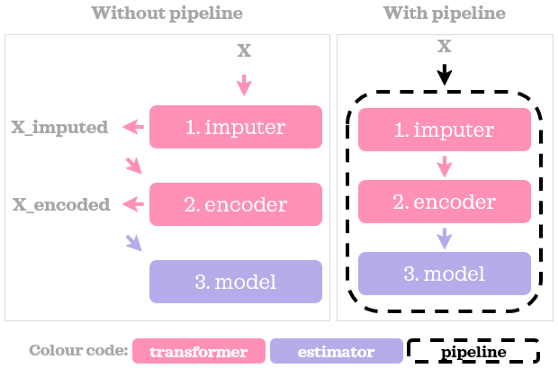


In [ ]:
#X_train.info()

In [ ]:
np.random.seed(0)
# select the float columns
num_columns = X.select_dtypes(include=['int64','float64']).columns
# select non-numeric columns
cat_columns = X.select_dtypes(exclude=['int64','float64']).columns
print(num_columns)
print(cat_columns)

##  Outlier remove 

In [ ]:
# Column selector 
class ColumnExtractor(TransformerMixin, BaseEstimator):
    def __init__(self, cols):
        self.cols = cols

    def transform(self, X, **transform_params):
        return X[self.cols]

    def fit(self, X, y=None, **fit_params):
        return self
# Outlier Handle 
class OutlierReplace(BaseEstimator,TransformerMixin):
    def __init__(self,factor=1.5):
        self.factor = factor

    def outlier_removal(self,X,y=None):
        X = pd.Series(X).copy()
        qmin=X.quantile(0.05)
        qmax=X.quantile(0.95)
        q1 = X.quantile(0.25)
        q3 = X.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (self.factor * iqr)
        upper_bound = q3 + (self.factor * iqr)
        #X.loc[((X < lower_bound) | (X > upper_bound))] = np.nan 
        X.loc[X < lower_bound] = qmin
        X.loc[X > upper_bound] = qmax
        return pd.Series(X)

    def fit(self,X,y=None):
        return self

    def transform(self,X,y=None):
        return X.apply(self.outlier_removal)  

# Complete Pipe 
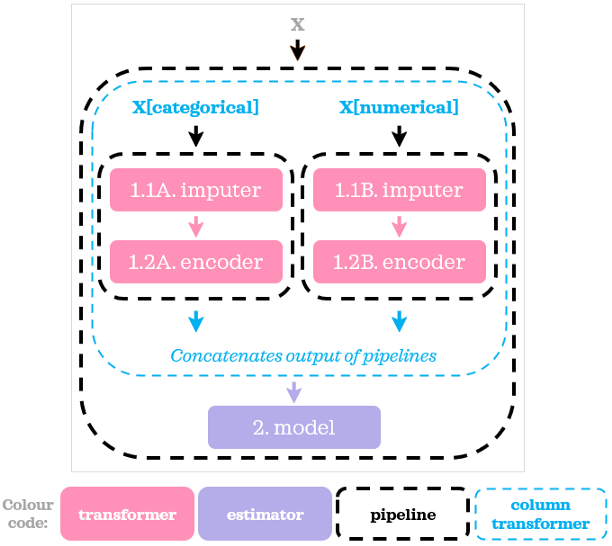

from sklearn.compose import make_column_transformer

cat_features = make_pipeline(
  TfidfVectorizer(ngram_range=(1, 2))
    #,SelectKBest(f_regression, k=300)
)

num_features= make_pipeline( OutlierReplace(),
                    SimpleImputer(strategy='median',add_indicator=True),
    StandardScaler()
)


data_preprocess_feature_extraction = make_column_transformer(
    ( cat_features , cat_columns),
    ( num_features, num_columns)
)

In [ ]:
get_text_data = FunctionTransformer(lambda x: x['clean_text'], validate=False)
get_numeric_data = FunctionTransformer(lambda x: x[num_columns], validate=False)
data_preprocess_feature_extraction =FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('Outlier', OutlierReplace()),
                    ('Imputer',SimpleImputer(strategy='median',add_indicator=True)),
                    ('Scaler',StandardScaler())
                    
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', TfidfVectorizer(ngram_range=(1, 2), binary=True)),
                    ('dim_red', SelectKBest(f_regression, k=10))
                ]))
             ]
        )

In [ ]:
xprep= data_preprocess_feature_extraction.fit_transform(X,y)
xprep

# Phase - Find the Best Pipeline¶
## Step 1 : Define CrossValidation Strategy :

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


cross_validation_design = KFold(n_splits=3,
                                shuffle=True,
                                random_state=77)

cross_validation_design

# Step 2 find the best model in iterative way
## Pipeline 1 : RandomForest Classifer

 from sklearn.ensemble import RandomForestRegressor

RF_MODEL = {}

# define pipe 
RF_MODEL['pipeline']=Pipeline([
                               ('features', data_preprocess_feature_extraction),
                               ('rf', RandomForestRegressor(random_state=7))])

# Define hyperparams
RF_MODEL['hyperparams'] = {}
RF_MODEL['hyperparams']['rf__n_estimators'] = [ 100]
#RF_MODEL['hyperparams']['rf__max_features'] = [None, 'sqrt', 'log2', .1, .25, .50, .75, .85]
#RF_MODEL['hyperparams']['rf__max_depth'] = [None, 4, 7, 10, 20]

# Search d'HP
RF_MODEL['gridsearch'] = GridSearchCV(
    estimator=RF_MODEL['pipeline'],
    param_grid=RF_MODEL['hyperparams'],
    scoring='neg_mean_squared_error',
    cv=cross_validation_design
)

RF_MODEL['gridsearch'].fit(X, y)

RF_MODEL['gridsearch'].best_params_

In [ ]:
#RF_MODEL['gridsearch'].cv_results_

rfpipe1=Pipeline([ ('features', data_preprocess_feature_extraction),
                               ('rf', RandomForestRegressor(random_state=7,n_estimators=150))])
rfpipe1.fit(X, y)

# Compute and print metrics
print("RMSE: {}".format(rfpipe1.score(X, y)))


## Pipe2 Xgboost  

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from scipy import sparse
from itertools import combinations


class SparseInteractions(BaseEstimator, TransformerMixin):
    def __init__(self, degree=2, feature_name_separator="_"):
        self.degree = degree
        self.feature_name_separator = feature_name_separator
    
    def fit(self, X, y=None):
        return self
        
    def transform(self, X):
        if not sparse.isspmatrix_csc(X):
            X = sparse.csc_matrix(X)
            
        if hasattr(X, "columns"):
            self.orig_col_names = X.columns
        else:
            self.orig_col_names = np.array([str(i) for i in range(X.shape[1])])
            
        spi = self._create_sparse_interactions(X)
        return spi
    
    
    def get_feature_names(self):
        return self.feature_names
    
    def _create_sparse_interactions(self, X):
        out_mat = []
        self.feature_names = self.orig_col_names.tolist()
        
        for sub_degree in range(2, self.degree + 1):
            for col_ixs in combinations(range(X.shape[1]), sub_degree):
                # add name for new column
                name = self.feature_name_separator.join(self.orig_col_names[list(col_ixs)])
                self.feature_names.append(name)
                
                # get column multiplications value
                out = X[:, col_ixs[0]]    
                for j in col_ixs[1:]:
                    out = out.multiply(X[:, j])

                out_mat.append(out)

        return sparse.hstack([X] + out_mat)
    

In [ ]:
from xgboost import XGBRegressor
from sklearn import metrics
from numpy import mean 
from numpy import absolute
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectKBest, chi2
XGB_pipe=Pipeline([('features', data_preprocess_feature_extraction),
                   ('int', SparseInteractions(degree=2)),
                   ('scale', MaxAbsScaler()),
                   ('XGB',  XGBRegressor(verbosity=0,n_estimators=120, n_jobs=6)) ])

scores = cross_val_score(XGB_pipe, X, y, scoring='neg_mean_absolute_error', cv=cross_validation_design, n_jobs=-1)
# convert scores to positive
scores = absolute(scores)
# summarize the result
s_mean = mean(scores)
print('Mean MAE: %.3f' % (s_mean))

In [ ]:
XGB_pipe.fit(X, y)
XGB_pipe.score(X, y)

from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.feature_selection import SelectKBest, chi2
 # Deine the pipe :
XGB_pipe=Pipeline([('features', data_preprocess_feature_extraction),
                   ('int', SparseInteractions(degree=2)),
                   ('scale', MaxAbsScaler()),
                   ('XGB',  XGBRegressor(verbosity=0)) ])
#  Define our search space for grid search
search_space = [
  {
    'XGB__n_estimators': [50, 100],
    'XGB__learning_rate': [0.01],
    #'XGB__max_depth': range(3, 10),
    #'XGB__colsample_bytree': [i/10.0 for i in range(1, 3)],
    #'XGB__gamma': [i/10.0 for i in range(3)],
    #'XGB__score_func': [chi2],
    #'XGB__k': [10],
  }
]
xgb_MODEL = GridSearchCV(estimator = XGB_pipe,param_grid = search_space, scoring='neg_mean_squared_error', cv=cross_validation_design)
xgb_MODEL.fit(X,y)

# Linear Regression: 

In [ ]:
from sklearn.linear_model import Ridge
#ridge_model = Ridge(fit_intercept=True, normalize=False)
ridge_model_pipe=Pipeline([('features', data_preprocess_feature_extraction),
                   ('int', SparseInteractions(degree=2)),
                   ('scale', MaxAbsScaler()),
                   ('ridge',  Ridge(fit_intercept=True, normalize=False)) ])

#scores = cross_val_score(ridge_model_pipe, X, y, scoring='neg_mean_absolute_error', cv=cross_validation_design, n_jobs=-1)
# convert scores to positive
#scores = absolute(scores)
# summarize the result
#s_mean = mean(scores)
#print('Mean MAE: %.3f' % (s_mean))

#  LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression
LinearRegression_pipe=Pipeline([('features', data_preprocess_feature_extraction),
                   ('int', SparseInteractions(degree=2)),
                   ('scale', MaxAbsScaler()),
                   ('ridge', LinearRegression()) ])
#scores = cross_val_score(LinearRegression_pipe, X, y, scoring='neg_mean_absolute_error', cv=cross_validation_design, n_jobs=-1)
# convert scores to positive
#scores = absolute(scores)
# summarize the result
#s_mean = mean(scores)
#print('Mean MAE: %.3f' % (s_mean))

# Import the hashing vectorizer
from sklearn.feature_extraction.text import HashingVectorizer
# Import functional utilities
from sklearn.preprocessing import FunctionTransformer, MaxAbsScaler
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# Perform preprocessing
get_text_data = FunctionTransformer(combine_text_columns, validate=False)
get_numeric_data = FunctionTransformer(lambda x: x[NUMERIC_COLUMNS], validate=False)
# Instantiate the winning model pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', HashingVectorizer(token_pattern=TOKENS_ALPHANUMERIC,
                                                     non_negative=True, norm=None, binary=False,
                                                     ngram_range=(1, 2))),
                    ('dim_red', SelectKBest(f_regression, k=300))
                ]))
             ]
        )),
        ('int', SparseInteractions(degree=2)),
        ('scale', MaxAbsScaler()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

# Submission 

In [ ]:
ct = CleanText()
test_clean = ct.fit_transform(test_raw['excerpt'])
tc = ReadabilityFeatures()
test_eda = tc.fit_transform(test_raw["excerpt"])
test_model = test_eda
test_model['clean_text'] = test_clean
test_model.columns.tolist()

In [ ]:
test_model.shape

In [ ]:

preds = XGB_pipe.predict(test_model)   
# use the method pipeline.predict on X_test data to predict the labels

my_submission = pd.DataFrame({'id': test_raw.id, 'target': preds.ravel()})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)


In [ ]:
my_submission